# California Housing
## Overview

When looking through datasets that contain over 20,000 instances of housing data, it would be very unlikely to not wonder about the insights that the data may possibly hold.

One may ask:
- What if you wanted to get rich off of real estate?
- What if you wanted to predict the next housing bubble?
- What if you could produce invaluable insights that could be the basis for further research?

Although the first two out of the three speculations are unlikely to result from just reading into our two datasets, it would be a waste to not break these chunks of information apart and see what we can get, but before we delve deep into our datasets, we should consider the limitations of our data.

1. The Kaggle dataset ("housing.csv") is an extracted (but not cleaned) version of the California 1990 Census and it holds median and total numerical values for housing features per district, separated by latitudinal and longitudinal coordinates. Kaggle is an online community platform for data enthusiasts. This dataset is a modified version from data that was gathered by associate professor, Luis Torgo, from the University of Porto, whom of which had collected the data from the California Census of 1990.

2. The recent housing listings data ("Total.csv"), which were posted from up to a year since 19 September 2018, only shows listings that are posted by real estate brokers on an industry-accepted information dissemination system, the California Regional Multiple Listing Service (CRMLS); therefore, off-market listings <u>are not</u> represented in the data.

Although there are some lingering questions that lay underneath our data (considering how it was obtained) and our resources are limited as to how accurately we can produce our analyses, we still are tasked to come to a data-driven conclusion to find out the answer to the following question:

If we took the top and bottom five percentiles of houses in California during the 1990s, in terms of median house value, and compared them to houses of the same standing that have been listed for sale within the last year in the same market, would there be a statistical difference between the two groups?

## Data Exploration and Cleanup

### Setting up and getting our hands dirty with the data
Before we can extract any meaningful and accurate analyses from our data, we must first make an attempt to understand all of its facets and not just search for whatever we want; that means, we must first 'get our hands dirty' with it. Although it can be irresistably fun just to mess around with our data, we should be aware that there is a more valuable incentive for doing so, which is described by the XY Problem.

** For further reasoning, please refer to the following link to a discussion which details the XY Problem: https://meta.stackexchange.com/questions/66377/what-is-the-xy-problem*

In order to be able to easily work with our data, we must first import the necessary dependencies and store our data.

In [2]:
# Import dependencies
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import gmplot
import scipy as stats
#from config import api_key

In [3]:
% matplotlib inline

In [4]:
# Read/store data
ca_1990 = pd.read_csv('Data/housing.csv')
ca_current = pd.read_csv('Data/Total.csv')

#### How many total instances are there?

In [5]:
ca_1990.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

#### Let's drop the rows with any missing values

In [6]:
ca_1990 = ca_1990.dropna()

In [7]:
ca_1990.count()

longitude             20433
latitude              20433
housing_median_age    20433
total_rooms           20433
total_bedrooms        20433
population            20433
households            20433
median_income         20433
median_house_value    20433
ocean_proximity       20433
dtype: int64

#### Reason for dropping values
There is an approximate 1% difference when rows with any empty values are dropped and the data is derived as the median of each of its categories per the district; therefore, the values are negligible.

### California Housing (1990) Analysis

#### The Search for Relationships
We were looking at the several features that was listed within our data (such as the longitudinal and latitudinal coordinates of each district, the median ages of the houses, the total number of rooms, and so forth)  and made several charts in an attempt to draw insights which may be lying underneath, and they are as follows:

#### Total Rooms per District vs Total Population District

FileNotFoundError: [Errno 2] No such file or directory: 'pngs/pop_vs_rooms_sub_groups.png'

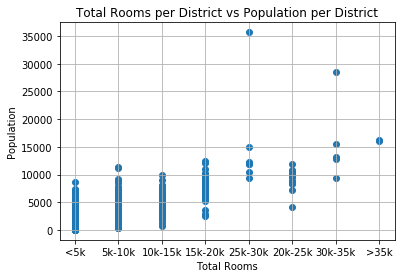

In [8]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
group_names = ["<5k", "5k-10k", "10k-15k", "15k-20k", "20k-25k", "25k-30k", "30k-35k", ">35k"]
ca_1990["total_rooms_groups"] = pd.cut(ca_1990['total_rooms'], bins, labels=group_names)

plt.scatter(ca_1990['total_rooms_groups'], ca_1990['population'])
plt.xlabel('Total Rooms')
plt.ylabel('Population')
plt.title('Total Rooms per District vs Population per District')
plt.grid()
plt.savefig("pngs/pop_vs_rooms_sub_groups.png", dpi=300)
plt.show()

* *The chart above depicts the frequencies for several ranges of number of total rooms per the district and is set against the total population of a district.*
* *It is intriguing to see that there is a concentration of districts that have zero to twenty thousand rooms and populations from zero to thirteen thousand.*

In [ ]:
# Slice the top 5%
top5 = ca_1990.iloc[:round(len(ca_1990['median_house_value'])*0.05), :].sort_values('median_house_value', ascending=False)
top5.head()

#### Top Five Percent of Median House Values vs Total Population

In [ ]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 13000]
group_names = ["<1k", "1k-2k", "2k-3k", "3k-4k", "4k-5k", "5k-6k", "6k-7k", ">7k"]
top5['population_groups'] = pd.cut(top5['population'], bins, labels=group_names)
top5.head()

In [ ]:
plt.scatter(top5['median_house_value'], top5['population_groups'], c='r')
plt.xlabel('House Value')
plt.ylabel('Population')
plt.title('Total Population vs Median House Value')
plt.savefig("pngs/Top5_PHV.png", dpi=300)
plt.show()

* *From the plot above, we can see that there is a general concentration in districts with populations ranging from zero to two thousand people per district, in respect to houses that rank in the top five percentile in terms of median house value.*
* *We can infer from this data that districts with this general range of population is ubiquitous and non-dependent of median house value.*
* *Intriguingly, we can see that houses that are worth approximately five hundred thousand dollars can vary from small to large numbers of population.*

#### Bottom Five Percent of Median House Values vs Total Population

In [9]:
bins = [0, 3000, 6000, 9000, 12000, 15000, 18000]
group_names = ["<3k", "3k-6k", "6k-9k", "9k-12k", "12k-15k", ">15k"]
bottom5["population_groups"] = pd.cut(bottom5['population'], bins, labels=group_names)

plt.scatter(bottom5['median_house_value'], bottom5['population_groups'], c='g')
plt.xlabel('House Value')
plt.ylabel('Population')
plt.title('Total Population vs Median House Value')
plt.savefig('pngs/Bottom5_PHV.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'bottom5' is not defined

* *From the plot above, we can see that there is a general concentration in districts with populations ranging from zero to three thousand people per district and from three to six thousand people per district, in respect to houses that rank in the bottom five percentile in terms of median house value.*
* *We can infer from this data that districts with these general ranges of populations are ubiquitous and non-dependent of median house value.*

In [10]:
# Slice the bottom 5%
bottom5 = ca_1990.iloc[round(len(ca_1990['median_house_value'])*0.95): len(ca_1990['median_house_value']),:].sort_values('median_house_value', ascending=False)
bottom5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_groups
20325,-119.04,34.28,21,1856,276.0,863,255,4.5833,500001,<1H OCEAN,<5k
20436,-118.69,34.21,10,3663,409.0,1179,371,12.5420,500001,<1H OCEAN,<5k
20233,-119.29,34.24,27,4742,775.0,1682,696,6.1940,500001,NEAR OCEAN,<5k
20427,-118.80,34.19,4,15572,2222.0,5495,2152,8.6499,500001,<1H OCEAN,15k-20k
20180,-119.39,34.32,19,3238,629.0,1195,443,4.8472,500001,NEAR OCEAN,<5k


#### Ocean Proximity

In [11]:
# Sort data by house value
ca_1990 = ca_1990.sort_values('median_house_value', ascending=False).reset_index(drop=True)
ca_1990.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_groups
0,-118.42,34.08,48,2413,261.0,770,248,15.0001,500001,<1H OCEAN,<5k
1,-117.66,33.48,22,809,180.0,334,157,2.3846,500001,<1H OCEAN,<5k
2,-118.50,33.97,29,2737,808.0,1157,696,5.1280,500001,<1H OCEAN,<5k
3,-122.47,37.73,50,1653,252.0,641,224,10.6605,500001,NEAR OCEAN,<5k
4,-122.47,37.73,52,2151,280.0,762,274,10.7309,500001,NEAR OCEAN,<5k


#### Ocean Proximity vs Count of Houses

In [ ]:
x_axis_op = ["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]
y_axis_op = ca_1990.groupby("ocean_proximity").count().rename(columns={"longitude": "count_of_houses"})["count_of_houses"]
plt.bar(x_axis_op, y_axis_op, alpha=0.5, align='center')
plt.xlabel("Ocean Proximity")
plt.ylabel("Count of Houses")
op_bar_chart = plt.title("Total Number of Houses in CA per OP Category")
plt.savefig('pngs/op_vs_count_of_houses.png', dpi=300)
plt.show()

* *The bar chart above depicts the total count of houses per each category.*
* *We can see that most of the houses in California are either less than one-hour away from the ocean or are inland.*
* *The chart also communicates that the majority of Californians lived less than one hour from the ocean during the 1990s.*

#### Top 5 Percent Ocean Proximity vs Count of Houses

In [ ]:
x_axis_op = ["<1H OCEAN", "INLAND", "NEAR BAY", "NEAR OCEAN"]
y_axis_op = top5.groupby("ocean_proximity").count().rename(columns={"longitude": "count_of_houses"})["count_of_houses"]
plt.bar(x_axis_op, y_axis_op, color='b', alpha=0.5, align='center')
plt.xlabel("Ocean Proximity")
plt.ylabel("Count of Houses")
op_bar_chart = plt.title("Top Five Percent")
plt.savefig("pngs/top_five_op_vs_COH.png", dpi=300)
plt.show()

* *The chart above shows the total count of houses per ocean proximity category for houses in the top five percent, in terms of median house value.*
* *The majority of these houses are in closer proximity to some body of water than houses that are inland.*

#### Bottom 5 Percent Ocean Proximity vs Count of Houses

In [ ]:
x_axis_op = ["<1H OCEAN", "INLAND", "NEAR BAY", "NEAR OCEAN"]
y_axis_op = bottom5.groupby("ocean_proximity").count().rename(columns={"longitude": "count_of_houses"})["count_of_houses"]
plt.bar(x_axis_op, y_axis_op, color='g', alpha=0.5, align='center')
plt.xlabel("Ocean Proximity")
plt.ylabel("Count of Houses")
op_bar_chart = plt.title("Bottom Five Percent")
plt.savefig("pngs/bottom_five_op_vs_COH.png", dpi=300)
plt.show()

* *The chart above depicts the total count of houses per ocean proximity category for houses in the bottom five percent, in terms of median house value.*
* *The majority of these houses are inland; furthest from any body of water in comparison to their counterparts.*


#### Top Five Ocean Proximity Average Median Price

In [ ]:
op_mean_house_value_top = top5.groupby("ocean_proximity")["median_house_value"].mean().round(2)
op_mean_df_top = pd.DataFrame(op_mean_house_value_top)
op_mean_df_top = op_mean_df_top.rename(columns={"median_house_value":"Average Median Price"})
op_mean_df_top['Average Median Price'] = op_mean_df_top['Average Median Price'].map('${:,.2f}'.format)
op_mean_df_top

* *Although we expect that being located closer to bodies of water usually translates to a higher price per house, the averages of the median values for our top five percent of houses in California have similar prices.*
* *Intriguingly, the inland category has an average value that is higher than any of the other categories, which are all nearer to some body of water.*

#### Bottom Five Ocean Proximity Average Median Price

In [ ]:
op_mean_house_value_bottom = bottom5.groupby("ocean_proximity")["median_house_value"].mean().round(2)
op_mean_df_bottom = pd.DataFrame(op_mean_house_value_bottom)
op_mean_df_bottom = op_mean_df_bottom.rename(columns={"median_house_value":"Average Median Price"})
op_mean_df_bottom['Average Median Price'] = op_mean_df_bottom['Average Median Price'].map('${:,.2f}'.format)
op_mean_df_bottom

* *Again, we expect that being located closer to bodies of water would translate to a higher price per house, the averages of the median values for our bottom five percent of houses in California deviates from our assumptions.*
* *The same surprise is evident in this data, when compared to its opposite counterpart.*

### California Housing (2018) Analysis

In [ ]:
ca_current.head()

In [ ]:
# Keep only the columns that are useful 
ca_current = ca_current[['Sub Type', 'St#', 'St Name', 'City', 'L/C Price', 'Br/Ba', 'YrBuilt']]
ca_current.head()

* *We cleaned our data frame of any superfluous information, as either some are not quantifiable or we simply cannot work with them due to our limited sets of data.*

#### Housing Age

Before calculating for the age, we must check for any missing values that lay in our YrBuilt column and the count of all instances in our data set.

In [ ]:
count = 0
for i in ca_current['YrBuilt'].isna():
    if i == True:
        count += 1
count

In [ ]:
ca_current.count()

In [ ]:
ca_current.count().min()

We also must calculate the number of values dropped if we were to delete all rows with any missing value.

In [ ]:
ca_current.dropna().count()

* *Here, we encounter something strange. Even though our for loop above states that there are 8 NaN values underneath the YrBuilt columns, when we drop all rows with any missing value, the total number of rows dropped is only 4.*
* *If we continue to attempt with a new dataframe that utilizes the .dropna() method, we will find that there is a bug in which most values become missing; therefore, we must fill all missing values with 0 in order to solve our issue.*

In [ ]:
# Split the string to isolate the integers
yr_blt = ca_current.loc[:, 'YrBuilt'].str.split('/', expand=True)[0]
# Turn the values into a data frame
yr_blt = pd.DataFrame(yr_blt)
# Fill the empty cells with 0
yr_blt = yr_blt.fillna(0)
# Create the new columns for age
ca_current['Age'] = ''
# Calculate for age
count = 0
for i in yr_blt[0]:
    # Values that were empty are now 0 years old.
    # We will count them later to determine whether or not we will drop them.
    i = 2018 - int(i)
    ca_current['Age'][count] = i
    count += 1
ca_current.head()

* *In the data frame above, we are calculating the current ages of our houses by subtracting the current year from the year they were built.*

#### Get rid of NaN Values under YrBuilt column

In [ ]:
# Grab all values with the year 2018 since 2018 - 0 = 2018
with_nan_df = ca_current.loc[ca_current['Age'] == 2018, :]
# Grab the values that are not NaN, but built in 2018
zero_bld = with_nan_df.loc[with_nan_df['YrBuilt'] == '0/BLD', :]
zero_asr = with_nan_df.loc[with_nan_df['YrBuilt'] == '0/ASR', :]
# Remove the houses that are built in 2018 and merge the necessary data frames
without_2018_df = pd.merge(ca_current, with_nan_df, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
with_zero_bld = pd.merge(without_2018_df, zero_bld, how='outer')
zero_asr['Age'] = zero_asr['Age'].apply(int)
without_nan_df = pd.merge(with_zero_bld, zero_asr, how='outer')

In [ ]:
# Create a new column with the house prices without the dollar sign 
without_nan_df['house_price'] = without_nan_df.loc[:, 'L/C Price'].str.split('$', expand=True)[1]

In [ ]:
plt.plot(without_nan_df['Age'], without_nan_df['house_price'])
plt.show()

In [ ]:
bins = [0, 100000, 500000, 1000000, 3000000, 5000000]
group_names = ["0-100k", "100k-500k", "500k-1M", "1M-3M", "3M-5M"]
#without_nan_df['house_price_group'] =
#pd.cut(without_nan_df['house_price'], bins, labels=group_names)
#without_nan_df['house_price'] = pd.to_numeric(
without_nan_df['house_price'] = without_nan_df['house_price'].str.split(expand=True)[0]
for i in without_nan_df['house_price']:
    i = int(i)
#plt.scatter(without_nan_df['Age'], without_nan_df['house_price_group'], c='r')
#plt.xlabel('House Value')
#plt.ylabel('Population')
#plt.title('Total Population vs Median House Value')
#plt.savefig("pngs/Top5_PHV.png", dpi=300)
#plt.show()


In [ ]:
plt.plot(without_nan_df['Age'], without_nan_df['house_price'], c='#17DD00')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Age vs Price of House')
plt.grid()
plt.savefig('pngs/age_vs_price_plt', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Grab the data frame and set the index to the listing price
sorted_ca_current = ca_current.set_index("L/C Price").reset_index()

Sort data by median house value and slice the top and bottom 5%

In [ ]:
# Slice the top 5%
top5_2018 = sorted_ca_current.iloc[round(len(sorted_ca_current['house_price'])*0.95): len(sorted_ca_current['house_price']),:]
top5_2018.head()

In [ ]:
# Slice the bottom 5%
bottom5_2018 = sorted_ca_current.iloc[:round(len(sorted_ca_current['house_price'])*0.05), :]
bottom5_2018.head()

## Analysis and Conclusion

#### T-test on 1990 house value and 2018 house value

In [ ]:
ca_current['L/C Price'] = df2['L/C Price'].str.strip('$')
ca_current['L/C Price'] = df2['L/C Price'].str.replace(',', "").astype(float)

In [ ]:
s1 = df1['median_house_value']
s2 = df2['L/C Price']

In [ ]:
data_s1 = {'s1': s1}
data_s1 = pd.DataFrame(data_s1)
data_s2 = {'s2': s2}
data_s2 = pd.DataFrame(data_s2)

In [ ]:
(t_stat, p) = stats.ttest_ind(s1, s2, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

In [ ]:
# Normalization
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled_s1 = min_max_scaler.fit_transform(data_s1)
np_scaled_s2 = min_max_scaler.fit_transform(data_s2)

In [ ]:
(t_stat, p) = stats.ttest_ind(np_scaled_s1, np_scaled_s2, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))